## Plate Generation 

-----------------------------------------

#### Step by Step 

##### Task : Randomly generate korean plate and annotaion (mask & code) 

- (1) Using Background image from Coco datasets 
- (2) Using Korean character Font Image / number Image 
- (3) 3 type plate generation ( xx 가 xxxx ) => wide, narrow, green 
- (4) max 5 plate in one background
- (5) label has 4 category type (detected object number , object position, plate category, plate code ) 


In [1]:
import cv2
import skimage
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [2]:
def read_img(filename, mode=cv2.IMREAD_COLOR, imshow=True,):
    
    img = cv2.imread(filename, mode)
    b, g, r = cv2.split(img)
    img2 = cv2.merge([r,g,b])
    if imshow:
        plt.imshow(img2)
        plt.xticks([]) # x축 눈금
        plt.yticks([]) # y축 눈금
        plt.show()
    return img2

def save_img(filename, img):
    
    b, g, r = cv2.split(img)
    
    r, g, b = cv2.split(img)
    
    img2 = cv2.merge([b,g,r])
    cv2.imwrite(filename, np.ndarray.astype(img2, int))

In [3]:
## Color Define 
BLACK = (0, 0, 0)
WHITE = (255,255,255)
YELLOW = (225, 180, 80)
ORANGE = (255, 180, 0)
DEEP_BLUE = (33, 44, 66 ) #외교용
LIGHT_BLUE = (185, 218, 238 )# - EV car
GREEN = (70, 130, 80)
BLUE = ( 50, 130, 170 ) # 영업용 택시 old Font

In [4]:

number_font_img_w = read_img('./test-image/mnist_long_new_font_h150.png', imshow = False)
print (number_font_img_w.shape)

letter_font_img_w = read_img('./test-image/kor_font_1126_height.png', imshow = False)
print (letter_font_img_w.shape)

number_font_img_g = read_img('./test-image/mnist_long_new_font_h150_gree.png', imshow = False)
print (number_font_img_g.shape)

letter_font_img_g = read_img('./test-image/kor_font_1126_green.png', imshow = False)
print (letter_font_img_g.shape)


(150, 1200, 3)
(1400, 1000, 3)
(150, 1200, 3)
(1050, 1000, 3)


In [5]:
def rtn_long_num_img(img, number, length, imshow=False):
    
    h, w, c = img.shape
    char_w = int(w/10)
    
    if type(number) is int : 
        text = str(number)
        while len(text) < length:
            text = '0'+text
        
        rtn_img = np.zeros((h, char_w*length, c))
        idx = 0
        for txt in text:
            num = int(txt)
            rtn_img[:,idx*char_w:(idx+1)*char_w,:] = img[:,num*char_w:(num+1)*char_w,:]/255.0
            idx += 1
        
        if imshow:
            plt.imshow(rtn_img)
            plt.xticks([]) # x축 눈금
            plt.yticks([]) # y축 눈금
            plt.show()
        
        return rtn_img
        
    else:
        print ('Input number type is Error!')
        return -1
    
rtn_num = rtn_long_num_img(number_font_img_w, 43, 4, imshow=False)

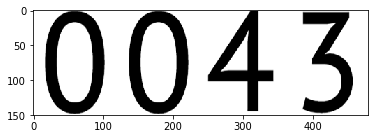

In [6]:
plt.imshow(rtn_num)

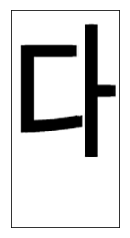

In [7]:
def rtn_letter(img, cls, imshow=False):
    ## Total Class = 62 
    h, w, c = img.shape
    char_w = int(w/10)
    char_h = int(h/7)
    
    num_idx_y = int(cls/10)
    num_idx_x = int(cls%10)
    
    rtn_img = img[num_idx_y*char_h:(num_idx_y+1)*char_h,num_idx_x*char_w:(num_idx_x+1)*char_w, :]/255.0
    
    if imshow:
        plt.imshow(rtn_img)
        plt.xticks([]) # x축 눈금
        plt.yticks([]) # y축 눈금
        plt.show()
            
    return rtn_img

rtn_char = rtn_letter(letter_font_img_w, 2, imshow=True)

184 825 3
(6, 92, 56, 7622)
[(0.02424, 0.08152, 0.11515, 0.81522), (0.1697, 0.08152, 0.11515, 0.81522), (0.30303, 0.16304, 0.12121, 0.65217), (0.44242, 0.08152, 0.11515, 0.81522), (0.58424, 0.08152, 0.11515, 0.81522), (0.7297, 0.08152, 0.11515, 0.81522), (0.87879, 0.08152, 0.11515, 0.81522)]
(184, 825, 3)


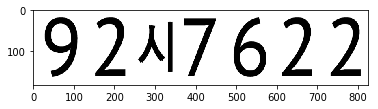

In [8]:
def rtn_random_plate_img(cls):
    
    
    # Class : 0~9(9-unknown)
    # Class 
    # 지역 : 15+1(un-readable)
    # 숫자 : 0~99 + -1(un-readable)
    # 글자 : 86 + -1(un-readable)
    # 숫자 : 0000~9999 + -1(un-readable)
    # total : 2+2+2+4 string
    
    ## loc - text : 0~15 
    loc_txt = np.random.randint(0, 16)
    ## 2-num : 0~99
    num_2 = np.random.randint(0, 100)
    ## 1-letter : 0~85 
    letter_1 = np.random.randint(0, 62)
    ## 4-num : 0~9999
    num_4 = np.random.randint(0, 10000)
    
    num_2_img = rtn_long_num_img(number_font_img_w, num_2, 2, imshow=False)
    h, w, c = num_2_img.shape
    let_1_img = rtn_letter(letter_font_img_w, letter_1, imshow=False)
    num_4_img = rtn_long_num_img(number_font_img_w, num_4, 4, imshow=False)
    
    img_concat = np.concatenate((num_2_img, let_1_img[:h], num_4_img), axis=1)
    
    h, w, c = img_concat.shape
    rtn_img2 = np.zeros( (194,980,3) ) + 1.0
    
    rtn_img2[20:20+h,88:88+w,:] = img_concat

    rtn_code = (cls, num_2, letter_1, num_4)
    
#    h, w, c = rtn_img2.shape
#    if cls == 5:
#        rtn_img2 = cv2.resize(rtn_img2, (int(w*0.6),int(h*0.8)))
#        rtn_img2 = rtn_img2[:, 20:-20,:]
        
    rtn_coord = [(20, 15, 95, 150 ), # in order of x, y, w, h 
                 (140, 15, 95, 150 ), 
                 (250, 30, 100, 120), 
                 (365, 15, 95, 150 ), 
                 (482, 15, 95, 150 ), 
                 (602, 15, 95, 150 ), 
                 (725, 15, 95, 150 )]
    
    h,w,c = rtn_img2[5:-5,80:-75,:].shape
    print (h, w, c)
    
    new_coord = []
    de_prec = 5
    for item in rtn_coord:
        x0, y0, w0, h0 = item
        new_coord.append( ( round(x0/w, de_prec), round(y0/h, de_prec), round(w0/w, de_prec), round(h0/h, de_prec)   ) )
    
    
    # Caution! - Return img in 0~1 float scale 
    return rtn_img2[5:-5,80:-75,:], rtn_code, new_coord #np.ndarray.astype(img_concat, int), rtn_code, rtn_coord

rtn_img, rtn_code, rtn_coord = rtn_random_plate_img(6)
print (rtn_code)
print (rtn_coord)
print (rtn_img.shape)
plt.imshow(rtn_img)



## Resize & coord invariance Test 

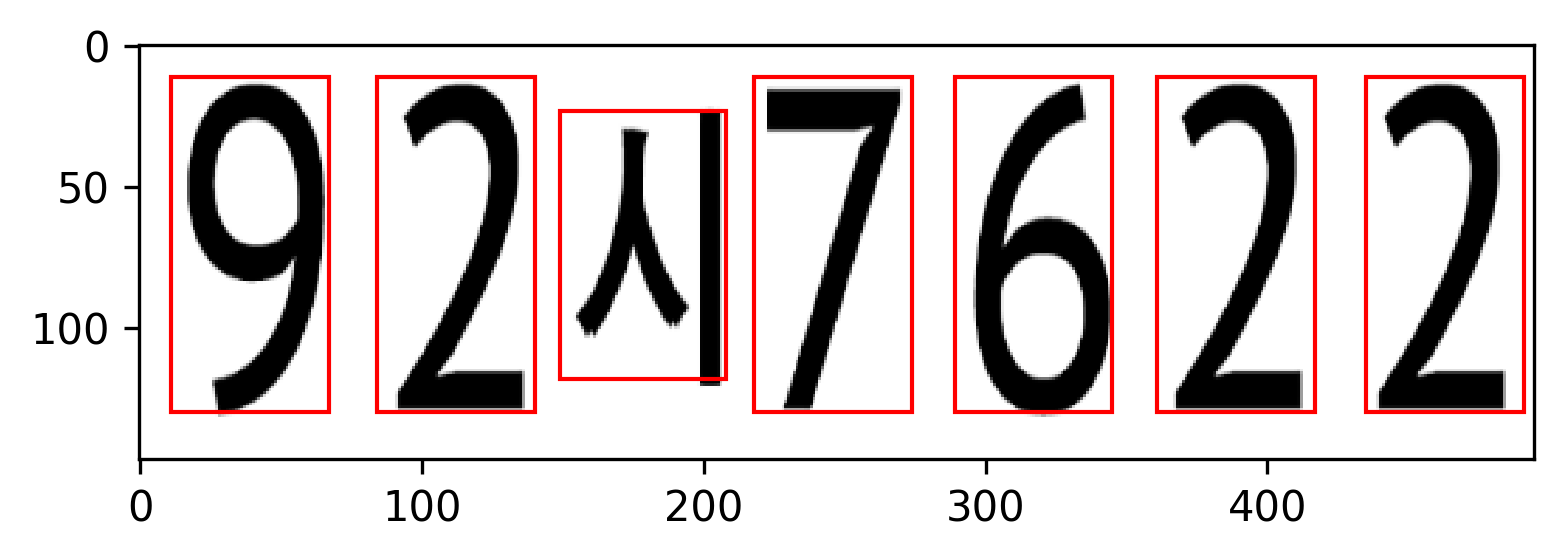

In [9]:
rtn_img_resized = cv2.resize(rtn_img, None, fx=0.6,fy=0.8)


fig2 = plt.figure(figsize=(6, 6), dpi=300)
ax2 = fig2.add_subplot(111, aspect='equal')

ax2.imshow(rtn_img_resized)

h, w, c = rtn_img_resized.shape

for item in rtn_coord:
    x0, y0, w0, h0 = item 
    ax2.add_patch(
             patches.Rectangle(
                (int(x0*w), int(y0*h ) ),
                int(w0*w),
                int(h0*h),
                fill=False,
                edgecolor='r'
             ) )


In [10]:
save_img(os.path.join('./', 'plate-tmp.png'), np.ndarray.astype(rtn_img*255.0, int))

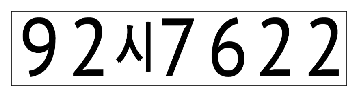

In [11]:
tmp = read_img('./plate-tmp.png', imshow = True)

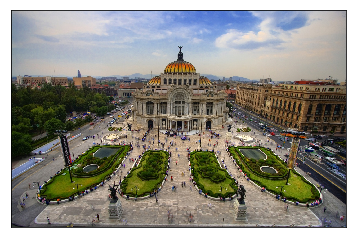

In [12]:
tmp = read_img('./bg-image/00001098.jpg', imshow = True)

In [13]:
rtn_img_resized = cv2.resize(rtn_img, None, fx=0.4,fy=0.4)
h, w, c = rtn_img_resized.shape
print (rtn_img.shape, (h,w,c) )

(184, 825, 3) (74, 330, 3)


In [14]:
tmp[20:20+h,50:50+w,:] = rtn_img_resized*255.0

In [15]:
save_img(os.path.join('./', 'tmp.png'), tmp)

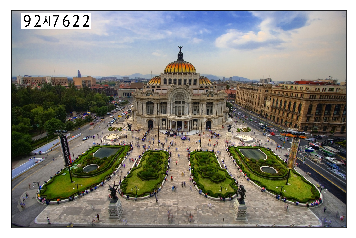

In [16]:
tmp2 = read_img('./tmp.png', imshow = True)

In [ ]:
import math 

def euler_to_mat(yaw, pitch, roll):
    # Rotate clockwise about the Y-axis
    c, s = math.cos(yaw), math.sin(yaw)
    M = np.matrix([[  c, 0.,  s],
                      [ 0., 1., 0.],
                      [ -s, 0.,  c]])

    # Rotate clockwise about the X-axis
    c, s = math.cos(pitch), math.sin(pitch)
    M = np.matrix([[ 1., 0., 0.],
                      [ 0.,  c, -s],
                      [ 0.,  s,  c]]) * M

    # Rotate clockwise about the Z-axis
    c, s = math.cos(roll), math.sin(roll)
    M = np.matrix([[  c, -s, 0.],
                      [  s,  c, 0.],
                      [ 0., 0., 1.]]) * M

    return M

def make_affine_transform(from_shape, to_shape, 
                          min_scale, max_scale,
                          scale_variation=1.0,
                          rotation_variation=1.0,
                          translation_variation=1.0):
    out_of_bounds = False

    from_size = np.array([[from_shape[1], from_shape[0]]]).T
    to_size = np.array([[to_shape[1], to_shape[0]]]).T

    scale = random.uniform((min_scale + max_scale) * 0.5 -
                           (max_scale - min_scale) * 0.5 * scale_variation,
                           (min_scale + max_scale) * 0.5 +
                           (max_scale - min_scale) * 0.5 * scale_variation)
    if scale > max_scale or scale < min_scale:
        out_of_bounds = True
    roll = random.uniform(-0.3, 0.3) * rotation_variation
    pitch = random.uniform(-0.2, 0.2) * rotation_variation
    yaw = random.uniform(-1.2, 1.2) * rotation_variation

    # Compute a bounding box on the skewed input image (`from_shape`).
    M = euler_to_mat(yaw, pitch, roll)[:2, :2]
    h, w, _ = from_shape
    corners = np.matrix([[-w, +w, -w, +w],
                            [-h, -h, +h, +h]]) * 0.5
    skewed_size = np.array(np.max(M * corners, axis=1) -
                              np.min(M * corners, axis=1))

    # Set the scale as large as possible such that the skewed and scaled shape
    # is less than or equal to the desired ratio in either dimension.
    scale *= np.min(to_size / skewed_size)

    # Set the translation such that the skewed and scaled image falls within
    # the output shape's bounds.
    trans = (np.random.random((2,1)) - 0.5) * translation_variation
    trans = ((2.0 * trans) ** 5.0) / 2.0
    if np.any(trans < -0.5) or np.any(trans > 0.5):
        out_of_bounds = True
    trans = (to_size - skewed_size * scale) * trans

    center_to = to_size / 2.
    center_from = from_size / 2.

    M = euler_to_mat(yaw, pitch, roll)[:2, :2]
    M *= scale
    M = np.hstack([M, trans + center_to - M * center_from])

    return M, out_of_bounds

def get_affine_coord(M, coords, boundary = (128, 128)):
    
    rtn_lst = []
    x_lst = []
    y_lst = []
    out_of_bound = False
    
    for coord in coords: 
        x, y = coord
        tmp_mat = [x, y, 1]
        
        tmp_x = int(np.dot(M[0,:], tmp_mat))
        tmp_y = int(np.dot(M[1,:], tmp_mat))
        x_lst.append(tmp_x)
        y_lst.append(tmp_y)
        rtn_lst.append( [tmp_x , tmp_y ] )
    
    b_width, b_height = boundary
    
    rtn_lst = np.array(rtn_lst )
    
    if np.sum(rtn_lst[:,0]<0) > 0 or np.sum(rtn_lst[:,0]>b_width) > 0:
        out_of_bound = True
    elif np.sum(rtn_lst[:,1]<0) > 0 or np.sum(rtn_lst[:,1]>b_width) > 0:
        out_of_bound = True
    
    return np.array(rtn_lst ), out_of_bound



In [ ]:

def generate_im():
    
    ## random pick bg 
    fname = "./bg-image/{:08d}.jpg".format(np.random.randint(0, 1069 - 1))
    bg_img = read_img(fname, imshow=False)
    
    plate_class = np.random.randint(5, 7)
    plate_ori, plate_text = rtn_random_plate_img(plate_class)
    h, w, c = plate_ori.shape
    plate_resized = cv2.resize(plate_ori, None, fx=0.4,fy=0.4)
    plate_mask = np.ones(plate_resized.shape)
    
    M, out_of_bounds = make_affine_transform(
                            from_shape=plate_resized.shape,
                            to_shape=bg_img.shape,
                            min_scale=0.3,
                            max_scale=0.5,
                            rotation_variation=0.8,
                            scale_variation=1.2,
                            translation_variation=1.2)
    
    coords = [(0,0), (plate_resized.shape[1], 0), (0, plate_resized.shape[0]), (plate_resized.shape[1], plate_resized.shape[0])]

    affine_coord, out_of_bound = get_affine_coord(M, coords, boundary = (bg_img.shape[0], bg_img.shape[1]))

    plate = cv2.warpAffine(plate_resized, M, (bg_img.shape[1], bg_img.shape[0]))
    plate_mask = cv2.warpAffine(plate_mask, M, (bg_img.shape[1], bg_img.shape[0]))
    
#    print (plate.shape, plate_mask.shape)
    
    out = plate * plate_mask + bg_img * (1.0 - plate_mask)
    #out = bg_img * (1 - plate_mask)
    
    out = np.array(out, dtype=int)
    out = np.clip(out, 0, 255)
    
    return out, plate_mask, plate_text, np.array(affine_coord), out_of_bound, bg_img

out_im, plate_mask, code, affine_coord, out_of_bound, bg_img = generate_im()

